<a href="https://colab.research.google.com/github/sriramtumu2006/Data_Science/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
tips=sns.load_dataset('tips')
iris=sns.load_dataset('iris')
print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))
tips.head()

Datasets loaded: tips (rows=244), iris (rows=150)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


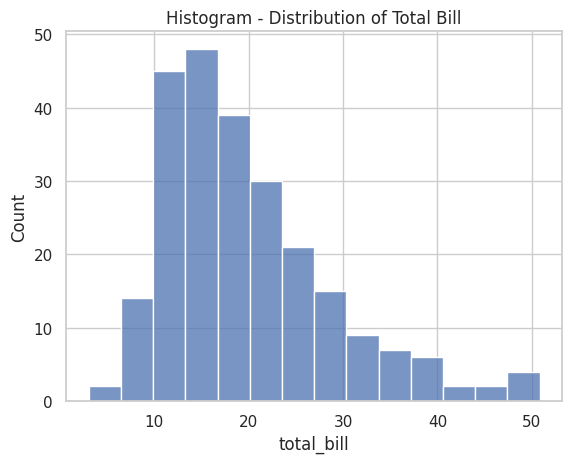

In [ ]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()

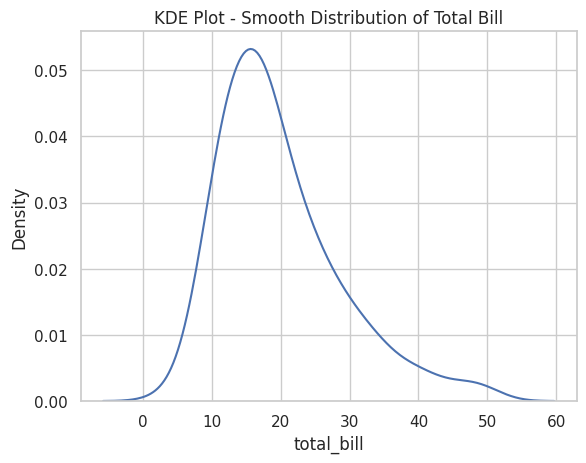

In [ ]:
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show() #KDE - Kernel Density Estimation.

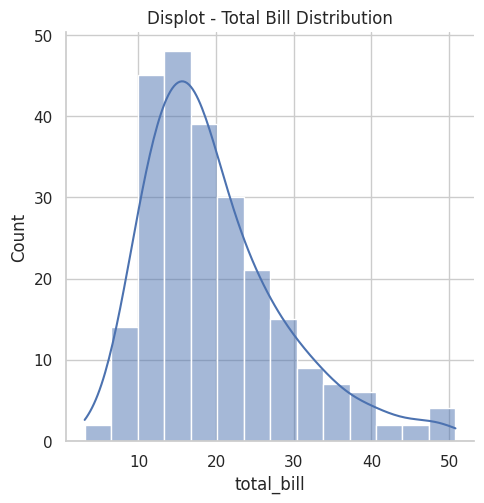

In [ ]:
sns.displot(tips['total_bill'], kde=True)
plt.title('Displot - Total Bill Distribution')
plt.show()

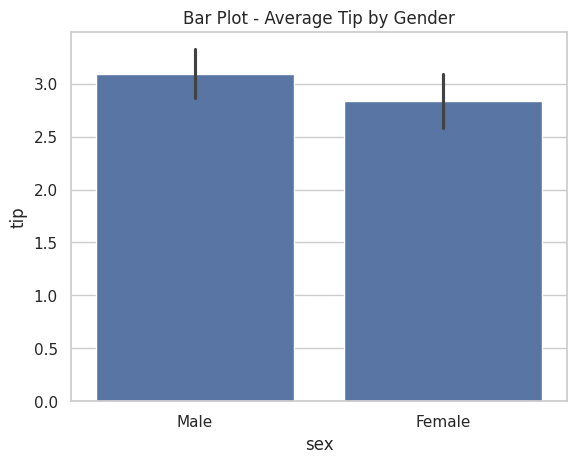

In [ ]:
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()

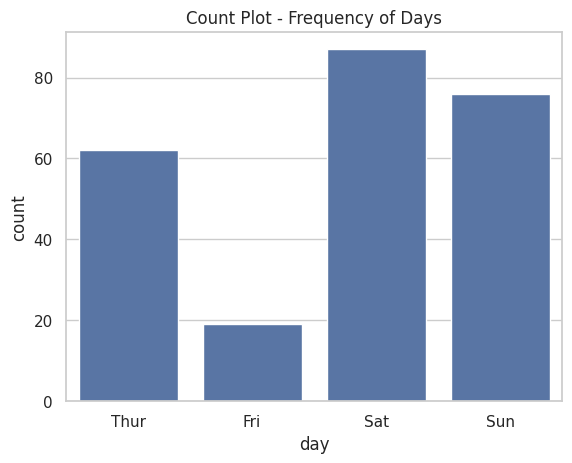

In [ ]:
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

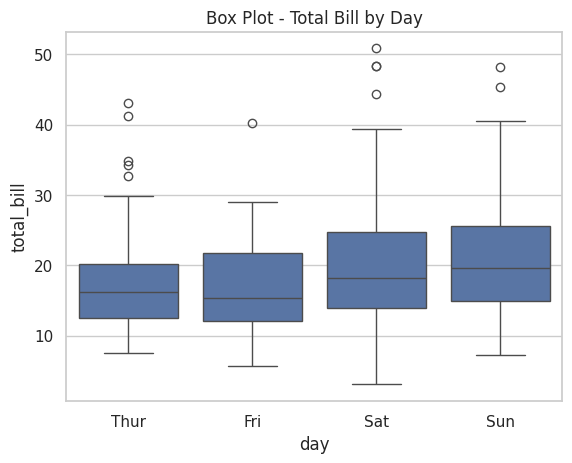

In [ ]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot - Total Bill by Day')
plt.show()

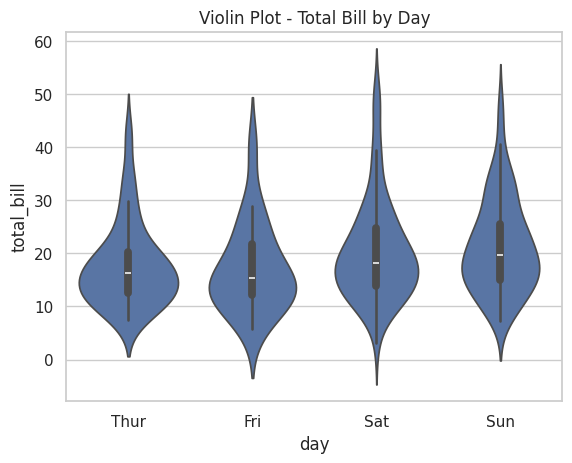

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

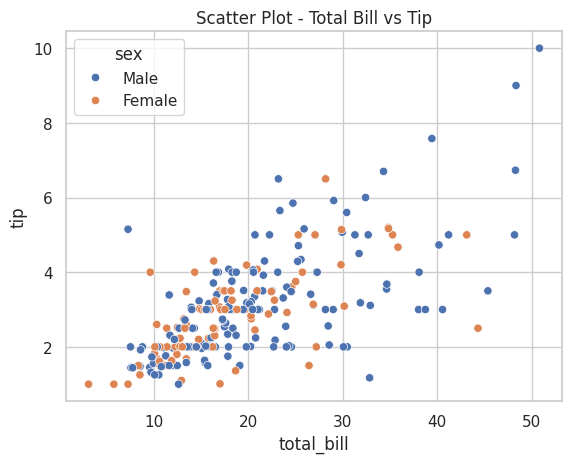

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

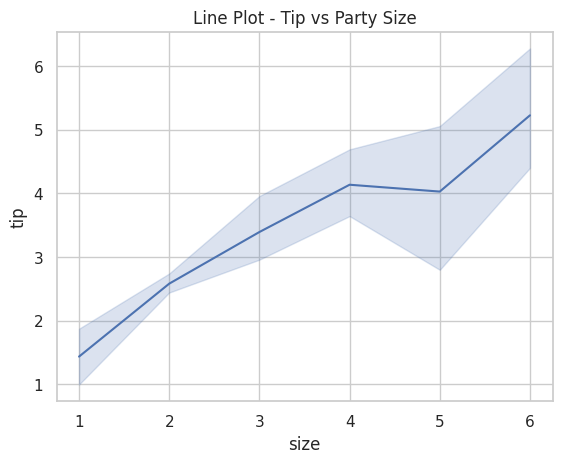

In [ ]:
sns.lineplot(x='size', y='tip', data=tips)
plt.title('Line Plot - Tip vs Party Size')
plt.show()

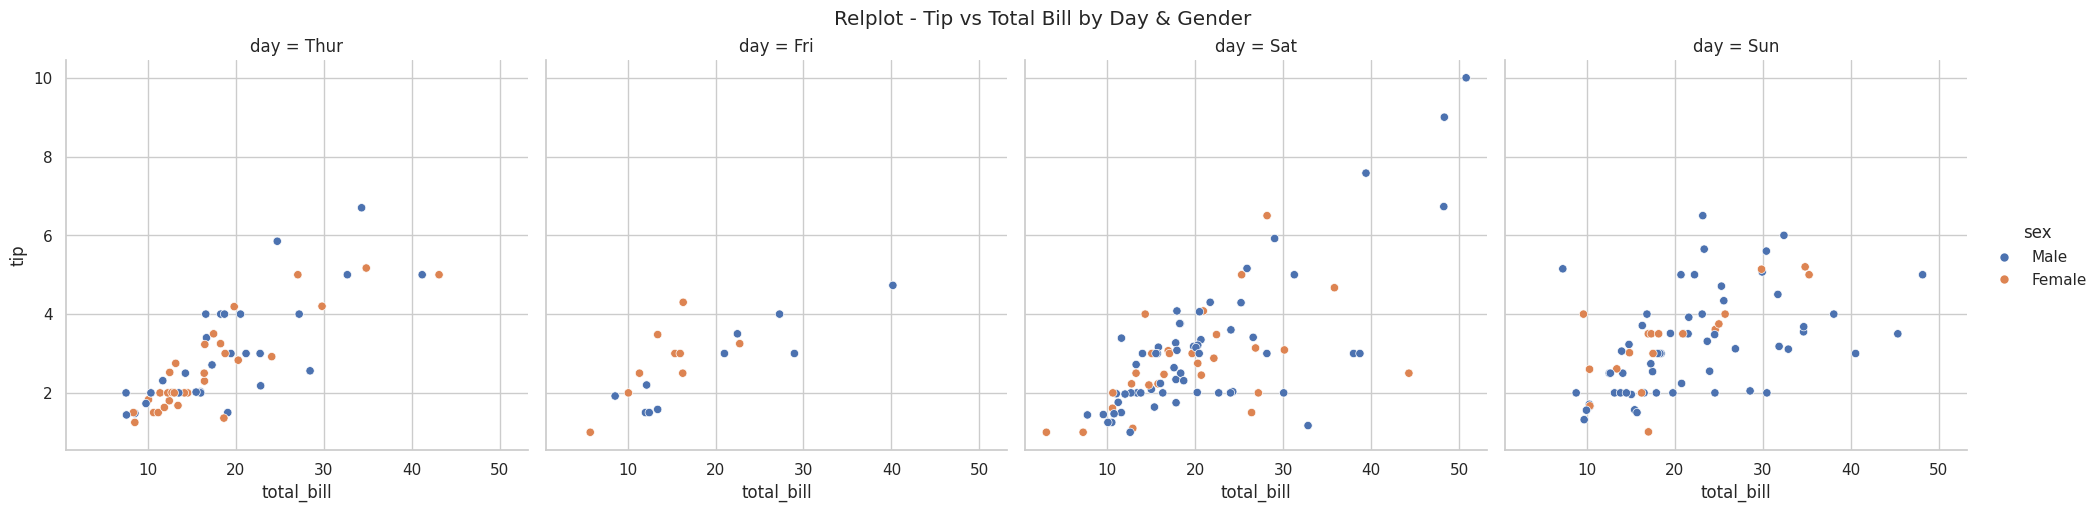

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

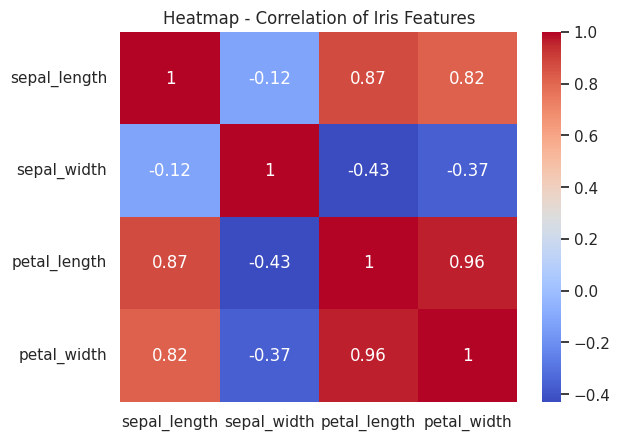

In [ ]:
iris_num = iris.select_dtypes(include=['float', 'int'])
corr = iris_num.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()

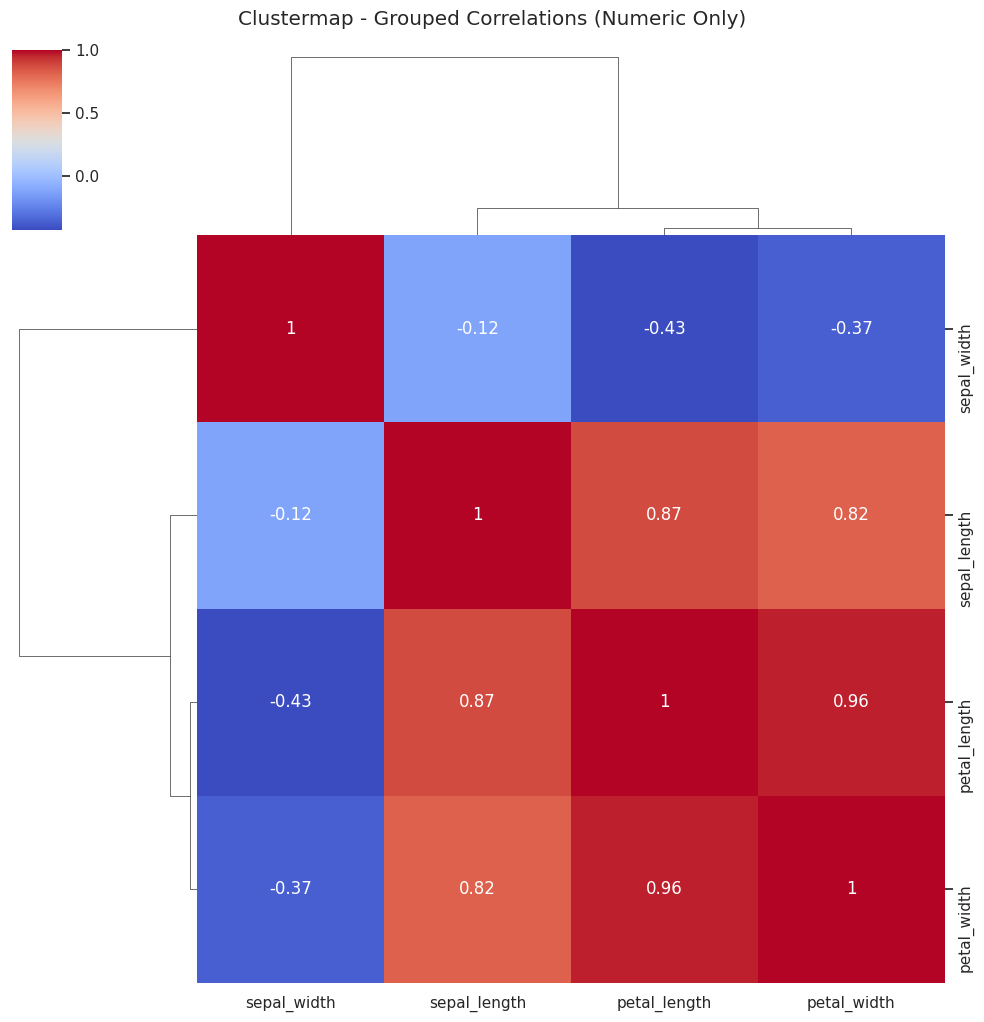

In [ ]:
iris_num = iris.select_dtypes(include=['float', 'int'])
corr = iris_num.corr()
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.suptitle('Clustermap - Grouped Correlations (Numeric Only)', y=1.02)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Customer_support_data.csv')

Mounted at /content/drive


In [ ]:
print(df.shape)
print(df.info())

(85907, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name

In [ ]:
print(df.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Customer Remarks']=df['Customer Remarks'].fillna(df['Customer Remarks'].mode)

In [ ]:
ist=df.select_dtypes(include=['float','int'])
df.fillna(ist.mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,2844
order_date_time,68692
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

/tmp/ipython-input-863245382.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


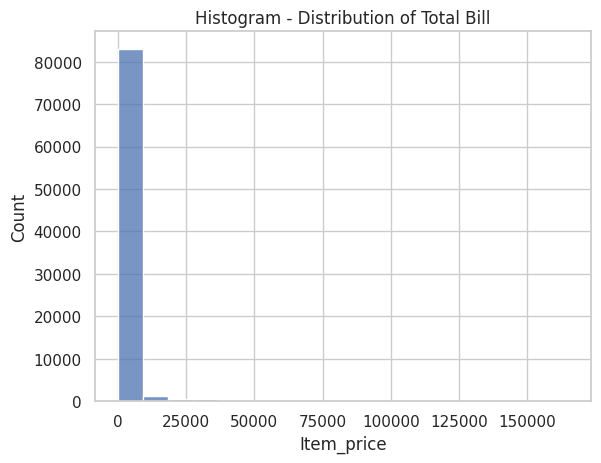

In [ ]:
import seaborn as sns
sns.histplot(df['Item_price'],kde=False)
plt.title("Histogram - Distribution of Total Bill")
plt.show()

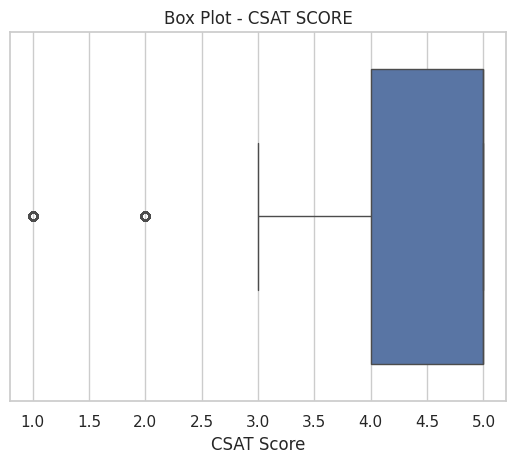

In [ ]:
sns.boxplot(x=df['CSAT Score'],data=df)
plt.title('Box Plot - CSAT SCORE')
plt.show()

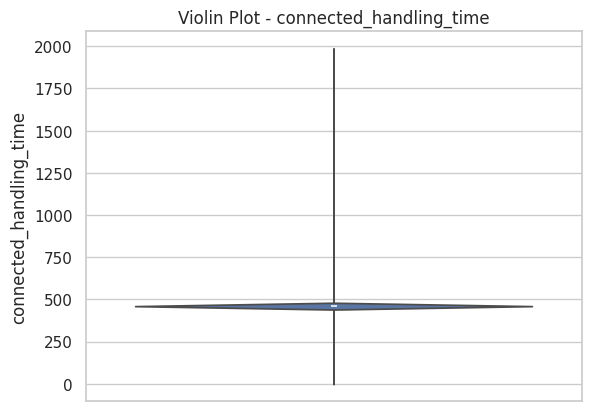

In [ ]:
sns.violinplot(df['connected_handling_time'])
plt.title('Violin Plot - connected_handling_time')
plt.show()

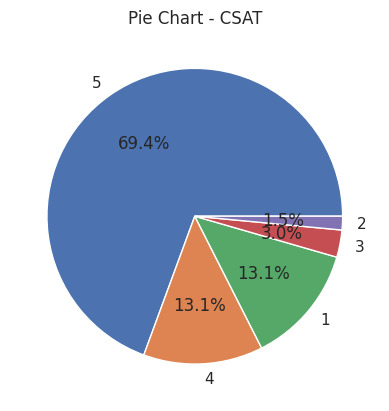

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['CSAT Score'].value_counts(),labels=df['CSAT Score'].unique(),autopct='%1.1f%%')
plt.title('Pie Chart - CSAT')
plt.show()

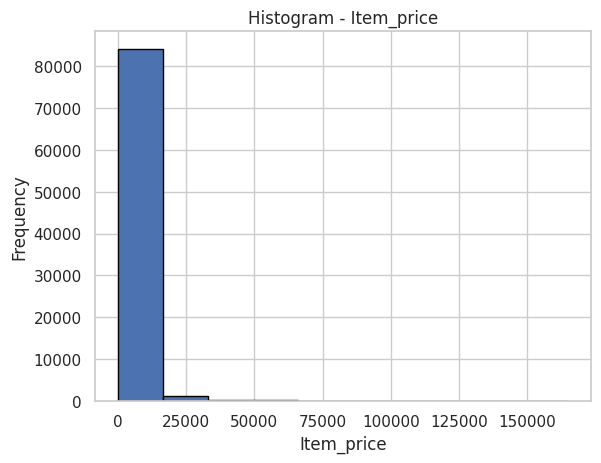

In [ ]:
plt.hist(df['Item_price'], bins=10, edgecolor='black')
plt.xlabel('Item_price')
plt.ylabel('Frequency')
plt.title('Histogram - Item_price')
plt.show()

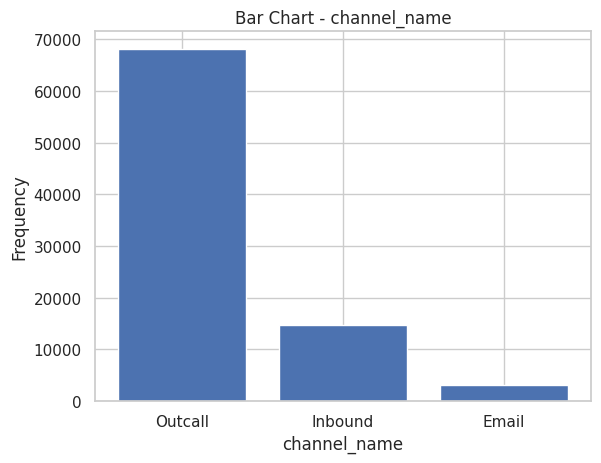

In [ ]:
plt.bar(df['channel_name'].unique(),df['channel_name'].value_counts())
plt.xlabel('channel_name')
plt.ylabel('Frequency')
plt.title('Bar Chart - channel_name')
plt.show()